# Capstone Project, EDA

This section will comprise of the following:

1. An exploratory analysis of the data.


2. An analysis of a basic trading strategy using the technical indicators that were created in the data collection section of the project.

## Import Libraries

In [208]:
# Import standard data analysis and manipulation libraries
import pandas as pd
import numpy as np

# Import charting library
import matplotlib.pyplot as plt
%matplotlib inline
# Set the plot style
plt.style.use('seaborn-darkgrid')

## Import Data

The gld_data.csv file that was created in the data collection stage can be imported here.

In [209]:
gld_data = pd.read_csv('./data/gld_data.csv', index_col=0)

In [210]:
gld_data.head()

,Open,High,Low,Close,RSI,pSAR,TEMA,ADX
Date,,,,,,,,
2011-02-10,132.110001,133.309998,132.000000,132.850006,46.092442,128.876541,131.462458,33.107729
2011-02-11,133.009995,133.440002,132.089996,132.320007,44.099798,129.153949,131.675929,31.074322
2011-02-14,132.949997,133.380005,132.699997,132.949997,47.031123,129.414712,131.874588,29.186158
2011-02-15,133.860001,134.169998,133.630005,133.970001,51.468512,129.659829,132.094962,27.407409
2011-02-16,134.229996,134.860001,133.449997,134.100006,52.020217,130.020643,132.338897,26.263413


In [211]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2734 entries, 2011-02-10 to 2021-12-20
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2734 non-null   float64
 1   High    2734 non-null   float64
 2   Low     2734 non-null   float64
 3   Close   2734 non-null   float64
 4   RSI     2734 non-null   float64
 5   pSAR    2734 non-null   float64
 6   TEMA    2734 non-null   float64
 7   ADX     2734 non-null   float64
dtypes: float64(8)
memory usage: 192.2+ KB


## Data Modification

The `Date` column needs to be restored to the `datetime`  data type.

In [212]:
gld_data.index = pd.to_datetime(gld_data.index)

In [213]:
gld_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2734 entries, 2011-02-10 to 2021-12-20
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    2734 non-null   float64
 1   High    2734 non-null   float64
 2   Low     2734 non-null   float64
 3   Close   2734 non-null   float64
 4   RSI     2734 non-null   float64
 5   pSAR    2734 non-null   float64
 6   TEMA    2734 non-null   float64
 7   ADX     2734 non-null   float64
dtypes: float64(8)
memory usage: 192.2 KB


## Exploratory Data Analysis

### Behavior of Closing Prices

The following will chart the closing price of GLD from Jan-2011 to Dec-2021.

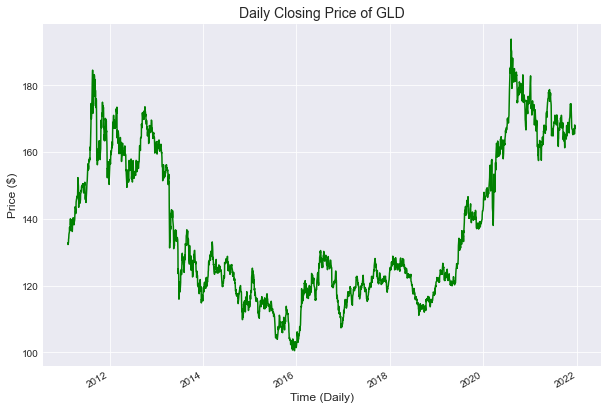

In [214]:
# Plot closing GLD prices
gld_data['Close'].plot(figsize=(10, 7), color='green')

# Title
plt.title("Daily Closing Price of GLD", fontsize=14)

# X-axis title
plt.xlabel('Time (Daily)', fontsize=12)

# Y-axis title
plt.ylabel('Price ($)', fontsize=12)

# Present graph
plt.show()

Observations: 

1. From Jan-2011 to December 2021, there isn't a discernable pattern in the data.  That is, there isn't a clear uptrend or downtrend in the data.  


2. However, when the data is viewed in smaller segments, there are clear patterns in the data.


3. Between early 2011 to late 2011, there's a clear uptrend in closing prices.


4. From 2012 to 2016 there was a strong downtrend in GLD, ending with a low of approximately \\$100.00 per share


5. From 2016 to 2019, GLD was range bound between \\$110.00 and \\$130.00 per share.


6. From late 2019 to early 2021, GLD was in a strong uptrend reaching \\$190.00 per share.

7. Since early 2021 until now, GLD is in a downtrend.

### Distribution of Daily Returns

The following inspects the distribution of GLD's daily returns.

- Create `Daily_Return` Column

In [215]:
gld_data['Daily_Return'] = gld_data['Close'].pct_change()

In [216]:
gld_data.head()

,Open,High,Low,Close,RSI,pSAR,TEMA,ADX,Daily_Return
Date,,,,,,,,,
2011-02-10,132.110001,133.309998,132.000000,132.850006,46.092442,128.876541,131.462458,33.107729,NaN
2011-02-11,133.009995,133.440002,132.089996,132.320007,44.099798,129.153949,131.675929,31.074322,-0.003989
2011-02-14,132.949997,133.380005,132.699997,132.949997,47.031123,129.414712,131.874588,29.186158,0.004761
2011-02-15,133.860001,134.169998,133.630005,133.970001,51.468512,129.659829,132.094962,27.407409,0.007672
2011-02-16,134.229996,134.860001,133.449997,134.100006,52.020217,130.020643,132.338897,26.263413,0.000970


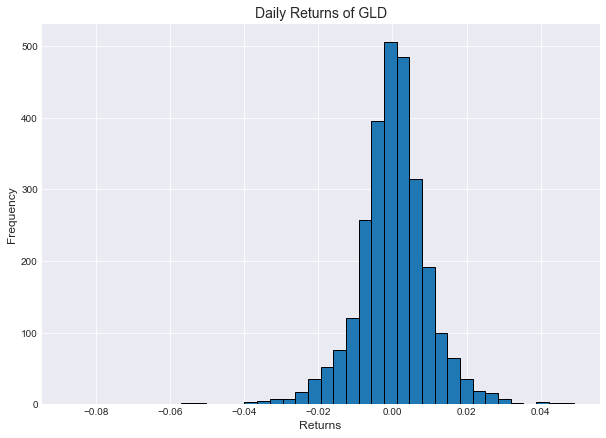

In [217]:
# Histogram of daily returns
plt.figure(figsize=(10,7))
gld_data['Daily_Return'].plot(kind='hist', bins=40, ec='black')

# Title of the plot
plt.title('Daily Returns of GLD', fontsize=14)

# X-axis title
plt.xlabel('Returns', fontsize=12)

# Y-axis title
plt.ylabel('Frequency', fontsize=12)

# Show graph
plt.show()

In [218]:
gld_data['Daily_Return'].describe()

count    2733.000000
mean        0.000133
std         0.009866
min        -0.087808
25%        -0.004792
50%         0.000407
75%         0.005108
max         0.049038
Name: Daily_Return, dtype: float64

Observations:

1. The mean for daily returns is very close to zero.


2. Approximately 68% (1 SD) of the returns lie between, roughly, -0.95% and +0.95%.


3. A daily returns of approximately of approximately -8.7% and +4.9% is rare and may present an opportunity to profit on a reversal.

## Strategy Development

In this section a "long only" strategy will be developed, and its performance evaluated.  A "long only" _(i.e., buy only)_ strategy was chosen over a "long short" _(i.e., buy and sell)_ strategy, because an ETF is an asset and not a derivative _(i.e., a contract that controls an underlying asset such as a futures contract)_; hence, it's shares need to be borrowed in order to enter into a short _(i.e., sell)_ side trade.  There are no guarantees that shares are available for short trades, on demand.

- Create new column to store signal

In [219]:
gld_data['signal'] = np.nan

In [220]:
gld_data.head()

,Open,High,Low,Close,RSI,pSAR,TEMA,ADX,Daily_Return,signal
Date,,,,,,,,,,
2011-02-10,132.110001,133.309998,132.000000,132.850006,46.092442,128.876541,131.462458,33.107729,NaN,NaN
2011-02-11,133.009995,133.440002,132.089996,132.320007,44.099798,129.153949,131.675929,31.074322,-0.003989,NaN
2011-02-14,132.949997,133.380005,132.699997,132.949997,47.031123,129.414712,131.874588,29.186158,0.004761,NaN
2011-02-15,133.860001,134.169998,133.630005,133.970001,51.468512,129.659829,132.094962,27.407409,0.007672,NaN
2011-02-16,134.229996,134.860001,133.449997,134.100006,52.020217,130.020643,132.338897,26.263413,0.000970,NaN


- Create Long (Buy) signal

> The following line checks whether all three BUY conditions are true.  If so, a long order is opened.  To simulate the opening of a trade, the `gld_data['signal']` column is set to 1. If not, no order is opened.

In [221]:
gld_data.loc[(gld_data['RSI'] < 80.0) &
             (gld_data['ADX'] > 25) &
             (gld_data['Daily_Return']).shift(1) > 0 &
             (gld_data['Close'] > gld_data['pSAR']) & 
             (gld_data['Close'] > gld_data['TEMA']), 'signal'] = 1

- Create Exit signal

> The following line checks both EXIT conditions are true.  If so, the previously opened BUY trade is closed.  If not, the previously opened BUY trade remains open.

In [222]:
gld_data.loc[(gld_data['Close'] < gld_data['pSAR']) &
             (gld_data['Close'] < gld_data['TEMA']), 'signal'] = 0

In [223]:
gld_data.head()

,Open,High,Low,Close,RSI,pSAR,TEMA,ADX,Daily_Return,signal
Date,,,,,,,,,,
2011-02-10,132.110001,133.309998,132.000000,132.850006,46.092442,128.876541,131.462458,33.107729,NaN,NaN
2011-02-11,133.009995,133.440002,132.089996,132.320007,44.099798,129.153949,131.675929,31.074322,-0.003989,NaN
2011-02-14,132.949997,133.380005,132.699997,132.949997,47.031123,129.414712,131.874588,29.186158,0.004761,1.0
2011-02-15,133.860001,134.169998,133.630005,133.970001,51.468512,129.659829,132.094962,27.407409,0.007672,1.0
2011-02-16,134.229996,134.860001,133.449997,134.100006,52.020217,130.020643,132.338897,26.263413,0.000970,1.0


- Fill `NaNs` with the last valid signal.

> When the signal column was populated with either 0 or 1, it is clear that each row will not generate a signal, thereby leaving the original `NaNs` in place.  In this case, the fillna method is used to bring the last observed signal forward the next observed signal in the column.

In [224]:
gld_data.isnull().sum()

Open               0
High               0
Low                0
Close              0
RSI                0
pSAR               0
TEMA               0
ADX                0
Daily_Return       1
signal          1139
dtype: int64

In [225]:
gld_data = gld_data.fillna(method = 'ffill')

In [226]:
gld_data.isnull().sum()

Open            0
High            0
Low             0
Close           0
RSI             0
pSAR            0
TEMA            0
ADX             0
Daily_Return    1
signal          2
dtype: int64

>There is one `NaN` remaining in the dataset.  It will be removed later, after calculating strategy returns.

- Calculate strategy returns

> To calculate strategy returns, the `Daily_Return` is multiplied by the previous day's `signal`. Here, it is assumed that the corresponding execution happens at the close of the day.

In [227]:
gld_data['Strategy_Returns'] = (gld_data['Daily_Return'] * gld_data['signal'].shift(1))

In [228]:
gld_data.head()

,Open,High,Low,Close,RSI,pSAR,TEMA,ADX,Daily_Return,signal,Strategy_Returns
Date,,,,,,,,,,,
2011-02-10,132.110001,133.309998,132.000000,132.850006,46.092442,128.876541,131.462458,33.107729,NaN,NaN,NaN
2011-02-11,133.009995,133.440002,132.089996,132.320007,44.099798,129.153949,131.675929,31.074322,-0.003989,NaN,NaN
2011-02-14,132.949997,133.380005,132.699997,132.949997,47.031123,129.414712,131.874588,29.186158,0.004761,1.0,NaN
2011-02-15,133.860001,134.169998,133.630005,133.970001,51.468512,129.659829,132.094962,27.407409,0.007672,1.0,0.007672
2011-02-16,134.229996,134.860001,133.449997,134.100006,52.020217,130.020643,132.338897,26.263413,0.000970,1.0,0.000970


- Drop any remaining `NaNs`.

In [229]:
gld_data = gld_data.dropna()

In [230]:
gld_data.isnull().sum()

Open                0
High                0
Low                 0
Close               0
RSI                 0
pSAR                0
TEMA                0
ADX                 0
Daily_Return        0
signal              0
Strategy_Returns    0
dtype: int64

- Calculate cumulative strategy returns

> The following line will sum the strategy's total return.



In [231]:
cumulative_strategy_returns = (gld_data['Strategy_Returns']+1).cumprod()

In [232]:
cumulative_strategy_returns

Date
2011-02-15    1.007672
2011-02-16    1.008650
2011-02-17    1.015720
2011-02-18    1.018503
2011-02-22    1.025122
                ...   
2021-12-14    1.063103
2021-12-15    1.063103
2021-12-16    1.063103
2021-12-17    1.063103
2021-12-20    1.063103
Name: Strategy_Returns, Length: 2731, dtype: float64

- Plot the cumulative strategy returns

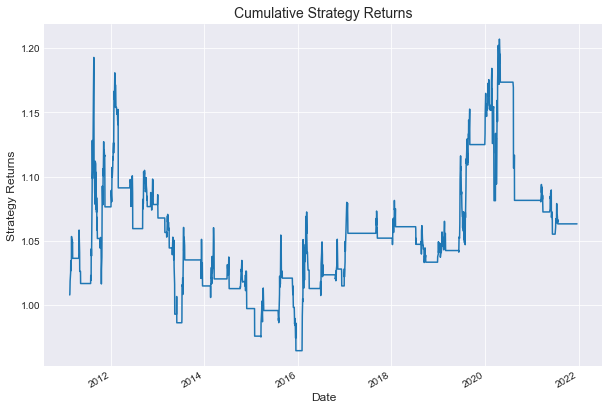

In [233]:
cumulative_strategy_returns.plot(figsize=(10, 7))

plt.title('Cumulative Strategy Returns', fontsize=14)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Strategy Returns', fontsize=12)
plt.show()

- Calculate the absolute returns

In [234]:
total_returns = (cumulative_strategy_returns.iloc[-1]-1)*100

print('The total returns of strategy is %.2f' % total_returns + '%')

The total returns of strategy is 6.31%
